In [43]:
# Import dependencies
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load in AQI csv
AQI_df = pd.read_csv("Resources/AQI_data.csv")
AQI_df.head()

,country,week,NO2,PM2.5
0,Argentina,1,9.850000,79.013889
1,Argentina,2,8.432540,65.119048
2,Argentina,3,6.671429,27.416667
3,Argentina,4,6.500000,23.750000
4,Argentina,5,5.178571,26.083333


In [3]:
# Load in Restrictions csv
restrictions_df = pd.read_csv("Resources/Countries_Lock_Down_Dates.csv")
restrictions_df.head()

,Country,Date of Restrictions,Level,Week of Restrictions
0,Argentina,3/21/20,National,12
1,Australia,3/23/20,National,13
2,Bolivia,3/22/20,National,13
3,Brazil,3/17/20,State,12
4,Canada,3/25/20,National,13


In [4]:
# Combine the dataframes on the country column
combined_df = pd.merge(AQI_df,restrictions_df,left_on="country",right_on="Country")

In [5]:
# Print the header of the combined dataframe
combined_df.head()

,country,week,NO2,PM2.5,Country,Date of Restrictions,Level,Week of Restrictions
0,Argentina,1,9.850000,79.013889,Argentina,3/21/20,National,12
1,Argentina,2,8.432540,65.119048,Argentina,3/21/20,National,12
2,Argentina,3,6.671429,27.416667,Argentina,3/21/20,National,12
3,Argentina,4,6.500000,23.750000,Argentina,3/21/20,National,12
4,Argentina,5,5.178571,26.083333,Argentina,3/21/20,National,12


In [6]:
cleaned_df = combined_df.drop("Country", 1)
cleaned_df

,country,week,NO2,PM2.5,Date of Restrictions,Level,Week of Restrictions
0,Argentina,1,9.850000,79.013889,3/21/20,National,12
1,Argentina,2,8.432540,65.119048,3/21/20,National,12
2,Argentina,3,6.671429,27.416667,3/21/20,National,12
3,Argentina,4,6.500000,23.750000,3/21/20,National,12
4,Argentina,5,5.178571,26.083333,3/21/20,National,12
...,...,...,...,...,...,...,...
567,Vietnam,9,13.809524,92.158730,3/31/20,National,14
568,Vietnam,10,12.873016,76.495238,3/31/20,National,14
569,Vietnam,11,12.873016,88.182540,3/31/20,National,14
570,Vietnam,12,9.492063,81.875661,3/31/20,National,14


In [7]:
# Add column to track whether country was under lockdown each week
cleaned_df["Restrictions"] = ""

# Determine whether each country was under lockdown each week 
for index, row in cleaned_df.iterrows():
    if (row["Week of Restrictions"] > row["week"]):
        cleaned_df.loc[index, "Restrictions"] = "No"
    else:
        cleaned_df.loc[index, "Restrictions"] = "Yes"

In [8]:
# Export to csv
cleaned_df.to_csv("foo.csv")

In [9]:
cleaned_df

,country,week,NO2,PM2.5,Date of Restrictions,Level,Week of Restrictions,Restrictions
0,Argentina,1,9.850000,79.013889,3/21/20,National,12,No
1,Argentina,2,8.432540,65.119048,3/21/20,National,12,No
2,Argentina,3,6.671429,27.416667,3/21/20,National,12,No
3,Argentina,4,6.500000,23.750000,3/21/20,National,12,No
4,Argentina,5,5.178571,26.083333,3/21/20,National,12,No
...,...,...,...,...,...,...,...,...
567,Vietnam,9,13.809524,92.158730,3/31/20,National,14,No
568,Vietnam,10,12.873016,76.495238,3/31/20,National,14,No
569,Vietnam,11,12.873016,88.182540,3/31/20,National,14,No
570,Vietnam,12,9.492063,81.875661,3/31/20,National,14,No


In [32]:
grouped_df = cleaned_df.groupby(["country","Restrictions"]).mean()
print(grouped_df.head(5))

                        week       NO2      PM2.5  Week of Restrictions
country   Restrictions                                                 
Argentina No             6.0  6.424441  36.385823                  12.0
          Yes           12.5  3.777778  29.769048                  12.0
Australia No             6.5  5.667712  29.802374                  13.0
          Yes           13.0  5.237778  24.563333                  13.0
Bolivia   No             6.5  8.306250  33.015972                  13.0


In [34]:
nice_df = pd.DataFrame(grouped_df[["NO2","PM2.5"]])

In [55]:
nice_df = nice_df.reset_index()

In [59]:
nice_df.head(50)

,country,Restrictions,NO2,PM2.5
0,Argentina,No,6.424441,36.385823
1,Argentina,Yes,3.777778,29.769048
2,Australia,No,5.667712,29.802374
3,Australia,Yes,5.237778,24.563333
4,Bolivia,No,8.306250,33.015972
5,Bolivia,Yes,5.000000,32.450000
6,Brazil,No,13.642695,53.673160
7,Brazil,Yes,13.211310,44.792262
8,Canada,No,11.664831,28.667101
9,Canada,Yes,8.712500,30.016667


<IPython.core.display.Javascript object>


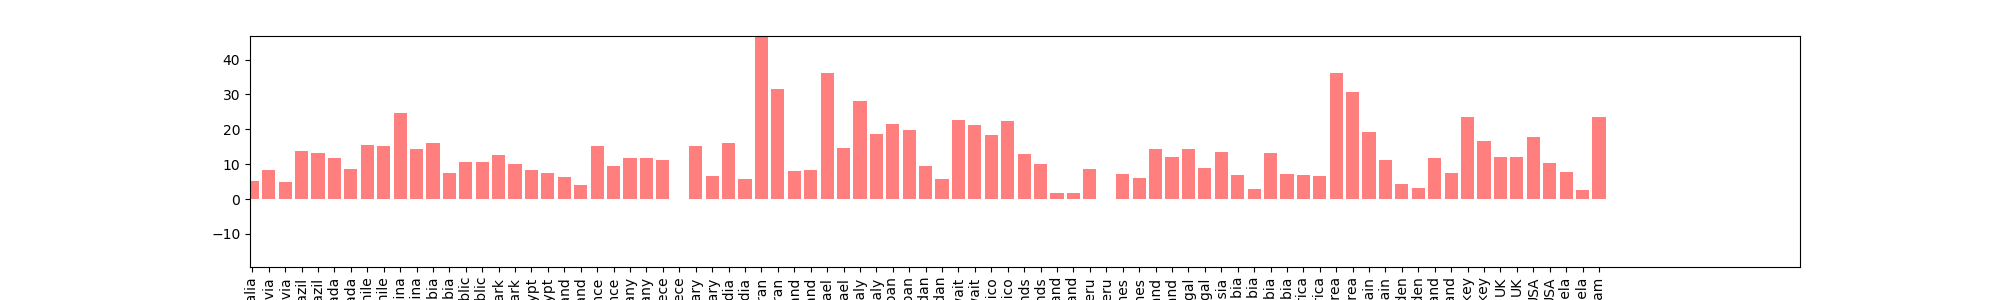

([<matplotlib.axis.XTick at 0x11aa81350>,
 <a list of 86 Text xticklabel objects>)

In [57]:
x_axis = np.arange(len(nice_df))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, nice_df["NO2"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, nice_df["country"], rotation="vertical")